In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from numpy import nan
from numpy import isnan
%matplotlib inline

## Data Preprocessing

use pandas to read the dataset and preprocess it.

In [2]:
# Loading the CSV data
df = pd.read_csv('./DS_CaseStudy_Churn_Pred_Data.csv')
df.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid
0,NaN,20190809,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20170223,Unavailable,0.0,107206.0,7542464.0
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.0,1.0,NaN,1,1,676.13,20180201,Completed,0.0,123034.0,6044316.0
2,16.45,20190830,20190830.0,14.39,NaN,836.63,0.0,1.0,NaN,2,1,836.63,20180905,Completed,0.0,201136.0,1959290.0
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,lpp42,1,12,NaN,20180113,Unavailable,0.0,403293.0,1250879.0
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,abac,4,12,NaN,20190702,Unavailable,0.0,448530.0,884375.0


In [3]:
# count the no. of non-NA/null observations
df.count(axis = 0)

delay                 2811
created_date          6587
pickup_date           2811
distance              2808
driver_rating            0
fare                  2808
discount              2808
payment_method        6587
promocode             1465
taximodelid           6587
travel_status         6587
trip_fare             2808
profile_created       6587
status_description    6586
pre_booked            6586
passengerid           6586
tripid                6586
dtype: int64

In [4]:
df.shape

(6587, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6587 entries, 0 to 6586
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   delay               2811 non-null   float64
 1   created_date        6587 non-null   int64  
 2   pickup_date         2811 non-null   float64
 3   distance            2808 non-null   float64
 4   driver_rating       0 non-null      float64
 5   fare                2808 non-null   float64
 6   discount            2808 non-null   float64
 7   payment_method      6587 non-null   float64
 8   promocode           1465 non-null   object 
 9   taximodelid         6587 non-null   int64  
 10  travel_status       6587 non-null   int64  
 11  trip_fare           2808 non-null   float64
 12  profile_created     6587 non-null   int64  
 13  status_description  6586 non-null   object 
 14  pre_booked          6586 non-null   float64
 15  passengerid         6586 non-null   float64
 16  tripid

In [6]:
df['promocode'] = pd.to_numeric(df['promocode'], errors='coerce')
df['status_description'] = pd.to_numeric(df['status_description'], errors='coerce')
df.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid
0,NaN,20190809,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20170223,NaN,0.0,107206.0,7542464.0
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.0,1.0,NaN,1,1,676.13,20180201,NaN,0.0,123034.0,6044316.0
2,16.45,20190830,20190830.0,14.39,NaN,836.63,0.0,1.0,NaN,2,1,836.63,20180905,NaN,0.0,201136.0,1959290.0
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20180113,NaN,0.0,403293.0,1250879.0
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4,12,NaN,20190702,NaN,0.0,448530.0,884375.0


In [7]:
df_1 = df.copy()
df_2 = df.copy()

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6587 entries, 0 to 6586
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   delay               2811 non-null   float64
 1   created_date        6587 non-null   int64  
 2   pickup_date         2811 non-null   float64
 3   distance            2808 non-null   float64
 4   driver_rating       0 non-null      float64
 5   fare                2808 non-null   float64
 6   discount            2808 non-null   float64
 7   payment_method      6587 non-null   float64
 8   promocode           0 non-null      float64
 9   taximodelid         6587 non-null   int64  
 10  travel_status       6587 non-null   int64  
 11  trip_fare           2808 non-null   float64
 12  profile_created     6587 non-null   int64  
 13  status_description  0 non-null      float64
 14  pre_booked          6586 non-null   float64
 15  passengerid         6586 non-null   float64
 16  tripid

In [9]:
df_1.describe(include='all')

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid
count,2811.000000,6.587000e+03,2.811000e+03,2808.000000,0.0,2808.000000,2808.000000,6587.000000,0.0,6587.000000,6587.000000,2808.000000,6.587000e+03,0.0,6586.000000,6586.000000,6.586000e+03
mean,8.029787,2.019072e+07,2.019071e+07,8.430385,NaN,417.409637,76.049801,1.071049,NaN,1.575528,5.453621,341.359733,2.017810e+07,NaN,0.010325,263355.820528,4.508892e+06
std,9.838131,7.657242e+01,8.255113e+01,10.252775,NaN,616.620949,397.990086,0.263923,NaN,2.029735,4.644230,519.103800,1.268524e+04,NaN,0.101093,152654.675701,2.600628e+06
min,-91.420000,2.019060e+07,2.019060e+07,0.000000,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,0.000000,2.015062e+07,NaN,0.000000,103.000000,1.238000e+03
25%,4.290000,2.019063e+07,2.019062e+07,2.890000,NaN,146.940000,0.000000,1.000000,NaN,1.000000,1.000000,109.160000,2.017042e+07,NaN,0.000000,130264.000000,2.254600e+06
50%,6.670000,2.019072e+07,2.019071e+07,5.510000,NaN,258.410000,0.000000,1.000000,NaN,1.000000,4.000000,215.665000,2.018073e+07,NaN,0.000000,264329.000000,4.527218e+06
75%,10.040000,2.019080e+07,2.019081e+07,10.222500,NaN,470.200000,0.000000,1.000000,NaN,1.000000,12.000000,411.990000,2.019053e+07,NaN,0.000000,395005.500000,6.776614e+06
max,355.330000,2.019083e+07,2.019083e+07,161.070000,NaN,10707.350000,10707.350000,3.000000,NaN,24.000000,13.000000,10486.460000,2.019083e+07,NaN,1.000000,528653.000000,9.012662e+06


In [10]:
# summation of all missing values
df_1.isnull().sum()

#  If required, get total summation of all missing values
#  df.isnull().sum().sum()

delay                 3776
created_date             0
pickup_date           3776
distance              3779
driver_rating         6587
fare                  3779
discount              3779
payment_method           0
promocode             6587
taximodelid              0
travel_status            0
trip_fare             3779
profile_created          0
status_description    6587
pre_booked               1
passengerid              1
tripid                   1
dtype: int64

In [11]:
# Looking for missing data
missing_data=df_1.isnull()

for col in missing_data.columns.values.tolist():
 print(col)
 print(missing_data[col].value_counts())
 print("")

delay
True     3776
False    2811
Name: delay, dtype: int64

created_date
False    6587
Name: created_date, dtype: int64

pickup_date
True     3776
False    2811
Name: pickup_date, dtype: int64

distance
True     3779
False    2808
Name: distance, dtype: int64

driver_rating
True    6587
Name: driver_rating, dtype: int64

fare
True     3779
False    2808
Name: fare, dtype: int64

discount
True     3779
False    2808
Name: discount, dtype: int64

payment_method
False    6587
Name: payment_method, dtype: int64

promocode
True    6587
Name: promocode, dtype: int64

taximodelid
False    6587
Name: taximodelid, dtype: int64

travel_status
False    6587
Name: travel_status, dtype: int64

trip_fare
True     3779
False    2808
Name: trip_fare, dtype: int64

profile_created
False    6587
Name: profile_created, dtype: int64

status_description
True    6587
Name: status_description, dtype: int64

pre_booked
False    6586
True        1
Name: pre_booked, dtype: int64

passengerid
False    6586
True

In [12]:
df_1.dropna(inplace=True)  # remove samples with all missing values
df_1.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid


In [13]:
df_1.shape

(0, 17)

In [14]:
df_2.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid
0,NaN,20190809,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20170223,NaN,0.0,107206.0,7542464.0
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.0,1.0,NaN,1,1,676.13,20180201,NaN,0.0,123034.0,6044316.0
2,16.45,20190830,20190830.0,14.39,NaN,836.63,0.0,1.0,NaN,2,1,836.63,20180905,NaN,0.0,201136.0,1959290.0
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20180113,NaN,0.0,403293.0,1250879.0
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4,12,NaN,20190702,NaN,0.0,448530.0,884375.0


In [15]:
df_2.shape

(6587, 17)

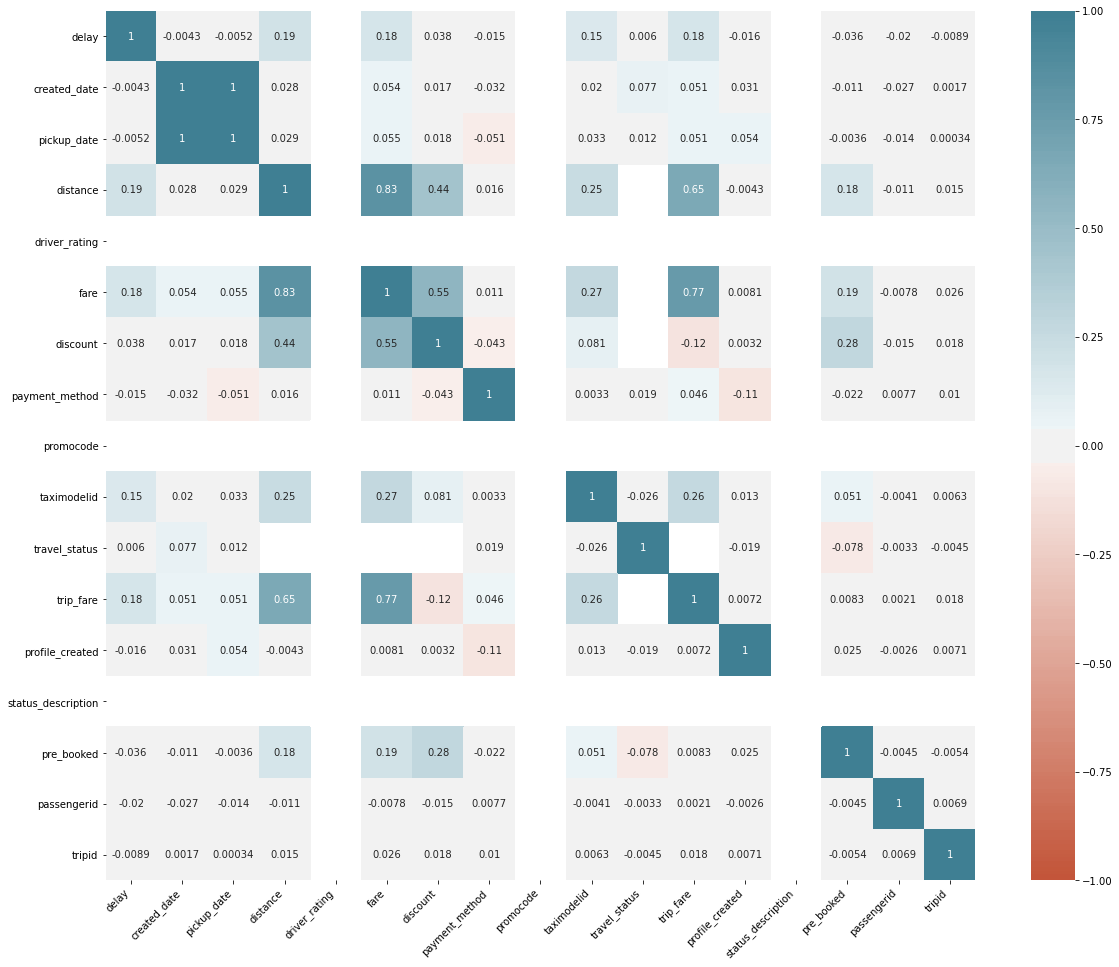

In [16]:
# have a look on correlation matrix of features
corrmat = df_2.corr()
f, ax = plt.subplots(figsize=(20, 16))
# sns.heatmap(corrmat, vmax=.8, square=True)
sns.heatmap(corrmat, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Green color means positive, red means negative. The stronger the color, the larger the correlation magnitude.

In [17]:
# df_3 = df_2.drop(['driver_rating', axis=1)
# Remove three columns as index base 
df_2.drop(df_2.columns[[4]], axis = 1, inplace = True) 
df_2.head()

,delay,created_date,pickup_date,distance,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid
0,NaN,20190809,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20170223,NaN,0.0,107206.0,7542464.0
1,8.38,20190701,20190701.0,16.49,676.13,0.0,1.0,NaN,1,1,676.13,20180201,NaN,0.0,123034.0,6044316.0
2,16.45,20190830,20190830.0,14.39,836.63,0.0,1.0,NaN,2,1,836.63,20180905,NaN,0.0,201136.0,1959290.0
3,NaN,20190709,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20180113,NaN,0.0,403293.0,1250879.0
4,NaN,20190718,NaN,NaN,NaN,NaN,1.0,NaN,4,12,NaN,20190702,NaN,0.0,448530.0,884375.0


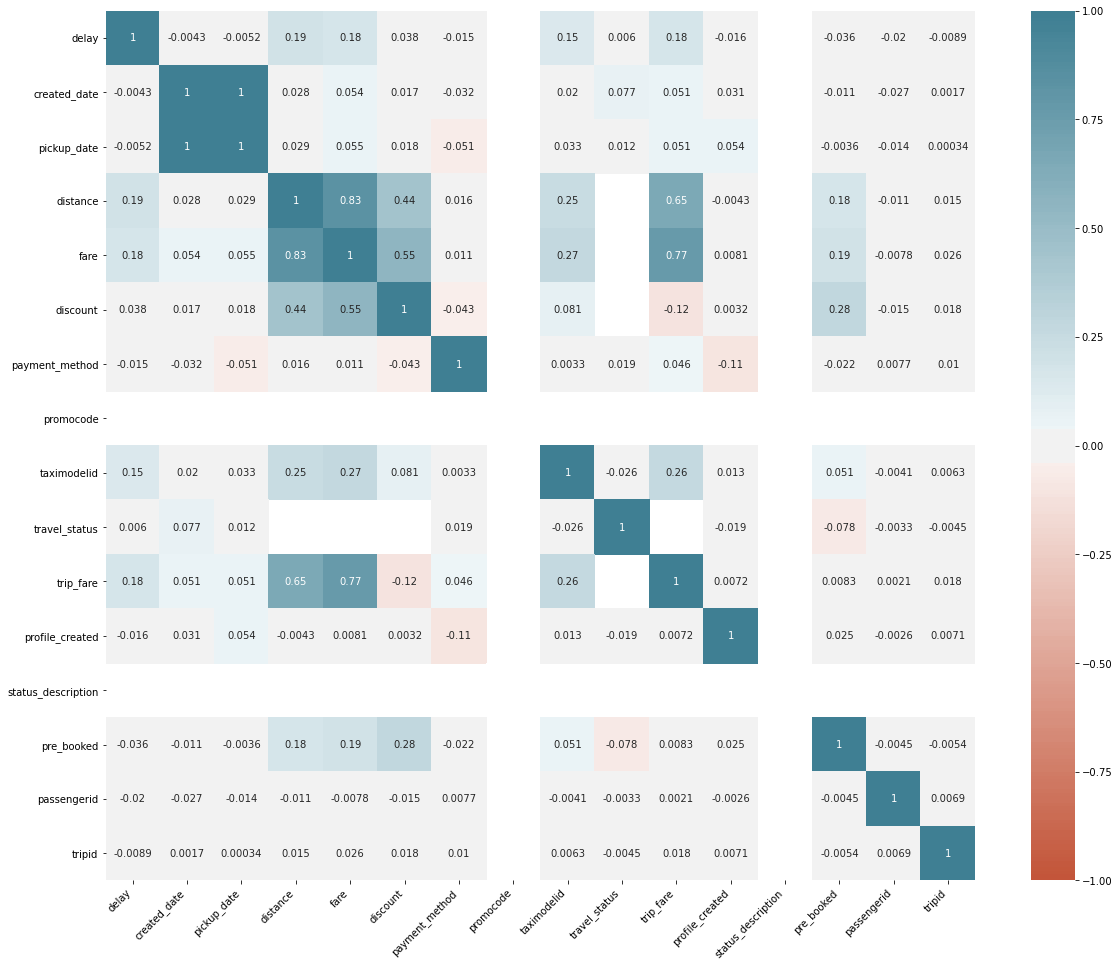

In [18]:
# have a look on correlation matrix of features
corrmat = df_2.corr()
f, ax = plt.subplots(figsize=(20, 16))
# sns.heatmap(corrmat, vmax=.8, square=True)
sns.heatmap(corrmat, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Exploratory Data Analysis

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:

* Travel Status: ,

There are 6587 entries in the dataset and 17 features.

### We combine features into two lists so that we can analyze them jointly. 

In [19]:
# categorical_features
categorical_features = [
    "promocode",
    "status_description",    
]
# numerical_features
numerical_features = ["delay", "created_date", "pickup_date","distance","fare",
                       "discount","payment_method","taximodelid","travel_status",
                       "travel_status","trip_fare","profile_created","status_description",
                       "pre_booked","passengerid","tripid"]

## Feature distribution

### Numerical features distribution

In [20]:
df_2[numerical_features].describe()

,delay,created_date,pickup_date,distance,fare,discount,payment_method,taximodelid,travel_status,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid
count,2811.000000,6.587000e+03,2.811000e+03,2808.000000,2808.000000,2808.000000,6587.000000,6587.000000,6587.000000,6587.000000,2808.000000,6.587000e+03,0.0,6586.000000,6586.000000,6.586000e+03
mean,8.029787,2.019072e+07,2.019071e+07,8.430385,417.409637,76.049801,1.071049,1.575528,5.453621,5.453621,341.359733,2.017810e+07,NaN,0.010325,263355.820528,4.508892e+06
std,9.838131,7.657242e+01,8.255113e+01,10.252775,616.620949,397.990086,0.263923,2.029735,4.644230,4.644230,519.103800,1.268524e+04,NaN,0.101093,152654.675701,2.600628e+06
min,-91.420000,2.019060e+07,2.019060e+07,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.015062e+07,NaN,0.000000,103.000000,1.238000e+03
25%,4.290000,2.019063e+07,2.019062e+07,2.890000,146.940000,0.000000,1.000000,1.000000,1.000000,1.000000,109.160000,2.017042e+07,NaN,0.000000,130264.000000,2.254600e+06
50%,6.670000,2.019072e+07,2.019071e+07,5.510000,258.410000,0.000000,1.000000,1.000000,4.000000,4.000000,215.665000,2.018073e+07,NaN,0.000000,264329.000000,4.527218e+06
75%,10.040000,2.019080e+07,2.019081e+07,10.222500,470.200000,0.000000,1.000000,1.000000,12.000000,12.000000,411.990000,2.019053e+07,NaN,0.000000,395005.500000,6.776614e+06
max,355.330000,2.019083e+07,2.019083e+07,161.070000,10707.350000,10707.350000,3.000000,24.000000,13.000000,13.000000,10486.460000,2.019083e+07,NaN,1.000000,528653.000000,9.012662e+06


array([[<AxesSubplot:title={'center':'delay'}>,
        <AxesSubplot:title={'center':'created_date'}>,
        <AxesSubplot:title={'center':'pickup_date'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'fare'}>,
        <AxesSubplot:title={'center':'discount'}>,
        <AxesSubplot:title={'center':'payment_method'}>,
        <AxesSubplot:title={'center':'taximodelid'}>],
       [<AxesSubplot:title={'center':'travel_status'}>,
        <AxesSubplot:title={'center':'travel_status'}>,
        <AxesSubplot:title={'center':'trip_fare'}>,
        <AxesSubplot:title={'center':'profile_created'}>],
       [<AxesSubplot:title={'center':'status_description'}>,
        <AxesSubplot:title={'center':'pre_booked'}>,
        <AxesSubplot:title={'center':'passengerid'}>,
        <AxesSubplot:title={'center':'tripid'}>]], dtype=object)

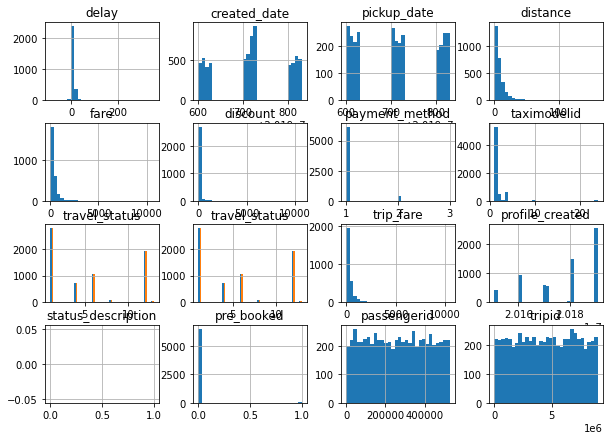

In [24]:
df_2[numerical_features].hist(bins=30, figsize=(10, 7))

In [22]:
# retrieve the numpy array
values = df_2.values
# define the imputer
# imputer = SimpleImputer(missing_values=nan,strategy='most_frequent') 
# imputer = SimpleImputer(missing_values=np.nan, strategy ='constant') 
imputer = KNNImputer(n_neighbors=5)
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0
